    # Automatic Jupyter Notebook for OpenML dataset 55: hepatitis

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 55
data = oml.datasets.get_dataset(did)
X, y, features = data.get_data(target=data.default_target_attribute, return_attribute_names=True)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,weka.Bagging_NaiveBayes(2),0.888465
1,weka.Bagging_NaiveBayes(1),0.887703
2,weka.NaiveBayes(13),0.886179
3,weka.kf.AttributeSelection-BestFirst-CfsSubset...,0.885417
4,weka.kf.ReplaceMissingValues-PKIDiscretize-Nai...,0.884654
5,weka.BayesNet_K2(6),0.882368
6,weka.BayesNet_K2(6),0.882368
7,weka.BayesNet_K2(6),0.882368
8,weka.BayesNet_K2(6),0.882368
9,weka.BayesNet_K2(6),0.882368


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


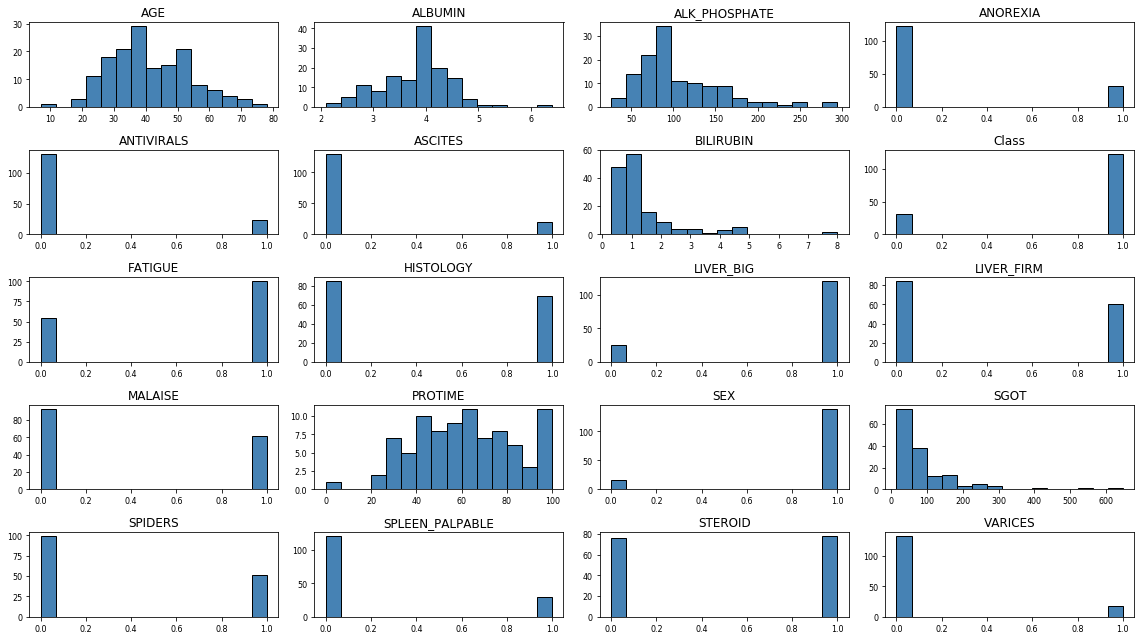

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,outlier
135,25,1,1,0,1,0,0,0,1,1,1,1,1,1.3,181,181,4.5,57,1,-0.0687241
37,20,0,0,0,1,1,1,0,1,1,1,0,0,2.3,150,68,3.9,nan,0,-0.0540432
83,67,0,0,0,1,1,0,1,0,nan,nan,nan,nan,1.5,179,69,2.9,nan,0,-0.0516425
150,46,1,1,0,1,1,1,1,0,0,1,1,1,7.6,nan,242,3.3,50,1,-0.0495736
125,34,0,1,0,1,1,1,0,1,0,1,0,0,0.7,70,24,4.1,100,1,-0.048416
103,51,1,0,0,1,1,1,1,1,1,1,0,1,4.6,215,269,3.9,51,1,-0.047707
127,50,1,1,0,1,0,0,1,1,1,0,1,1,2.8,155,75,2.4,32,1,-0.0465624
140,36,1,0,0,1,1,1,0,1,0,1,0,1,1.7,295,60,2.7,nan,1,-0.0462578
153,53,0,0,0,1,0,0,1,0,1,1,0,1,1.5,81,19,4.1,48,1,-0.0432926
147,70,1,0,0,1,1,1,nan,nan,nan,nan,nan,nan,1.7,109,528,2.8,35,1,-0.0421446


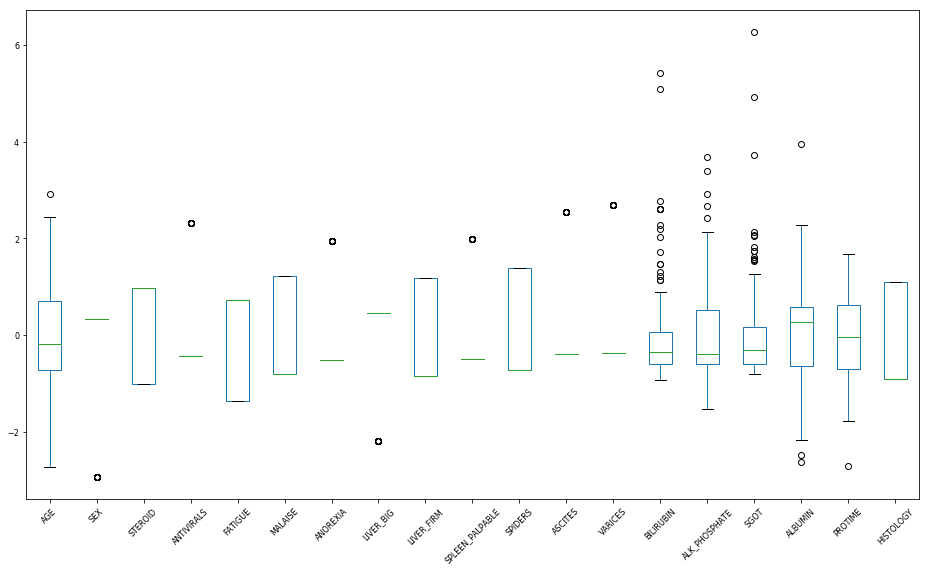

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

   did                              name  similarity  \
0  336                             SPECT       0.839   
1   13                     breast-cancer       0.748   
2   52                            trains       0.730   
3  172           shuttle-landing-control       0.718   
4  186                     braziltourism       0.704   
5  470                             profb       0.681   
6  334                  monks-problems-2       0.680   
7  144  BNG(hypothyroid,nominal,1000000)       0.650   
8   34        postoperative-patient-data       0.639   
9  449               analcatdata_homerun       0.623   

                            url  
0  https://www.openml.org/d/336  
1   https://www.openml.org/d/13  
2   https://www.openml.org/d/52  
3  https://www.openml.org/d/172  
4  https://www.openml.org/d/186  
5  https://www.openml.org/d/470  
6  https://www.openml.org/d/334  
7  https://www.openml.org/d/144  
8   https://www.openml.org/d/34  
9  https://www.openml.org/d/449  


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

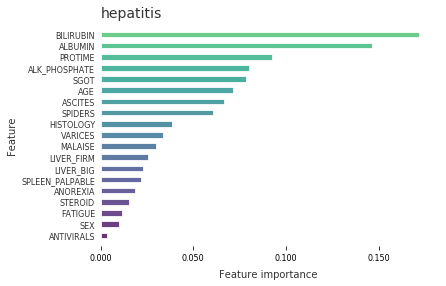

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

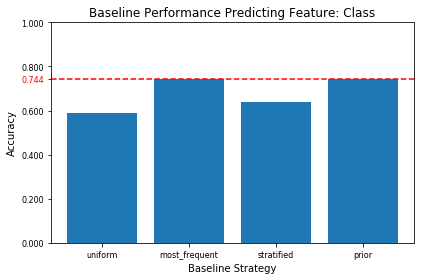

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Run already exists in OpenML, WIP


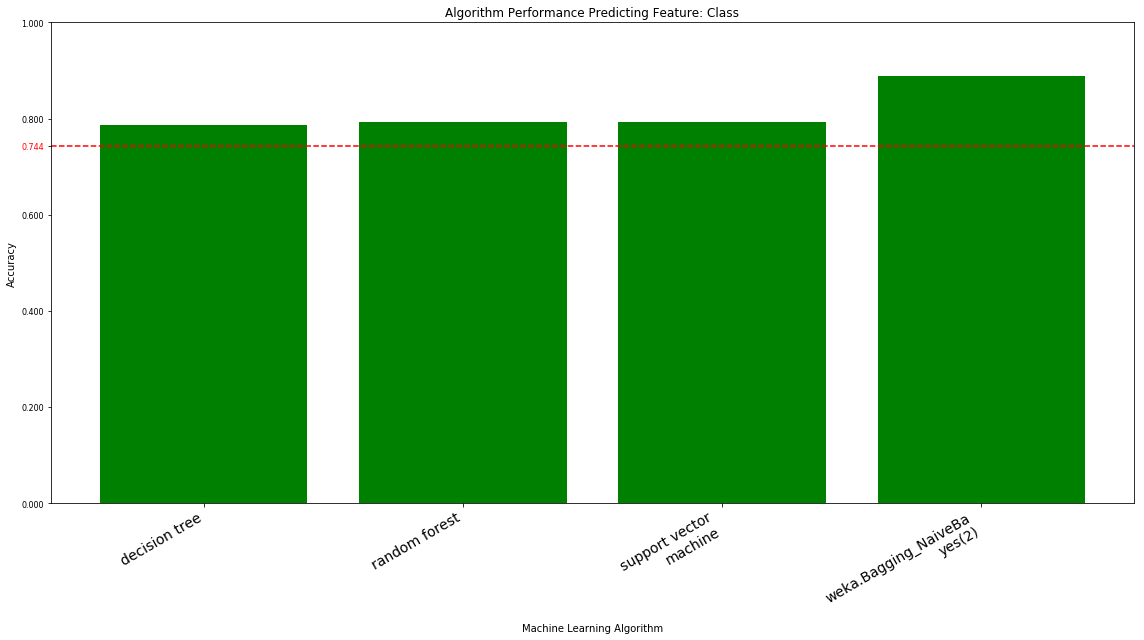

In [10]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, strats, maxBaseline, problemType) 

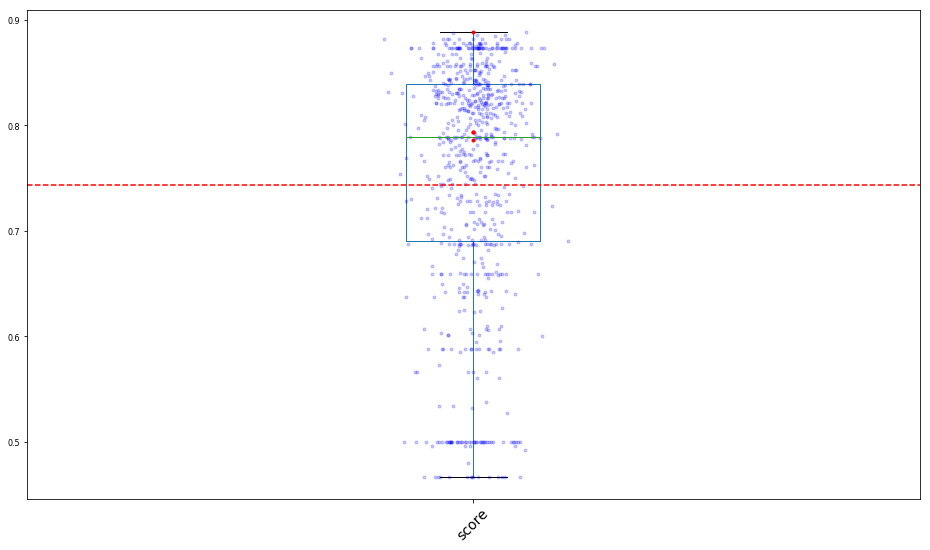

In [11]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, strats, maxBaseline) 